In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [13]:
penguins = sns.load_dataset("penguins")

In [14]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:>

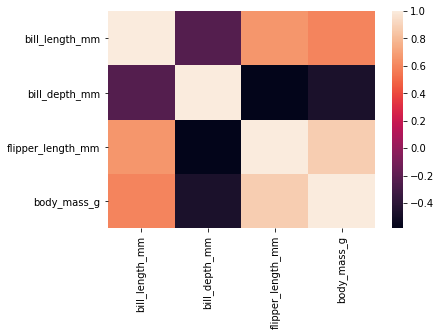

In [15]:
sns.heatmap(penguins.corr())

# korelasyonuna bakınca anlamlı veriler çıkıyor

<AxesSubplot:>

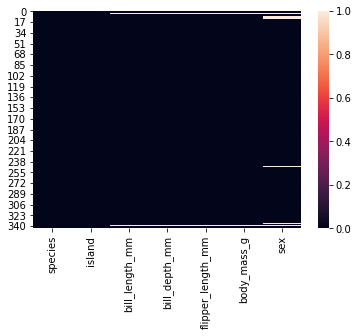

In [16]:
# missing value'ları incelemek için heatmap kullanabilirsin.

sns.heatmap(penguins.isnull())

# missing datalarına bakalım. isnull True False döndürecek
# 0 değerine yakın null'lar var

<AxesSubplot:>

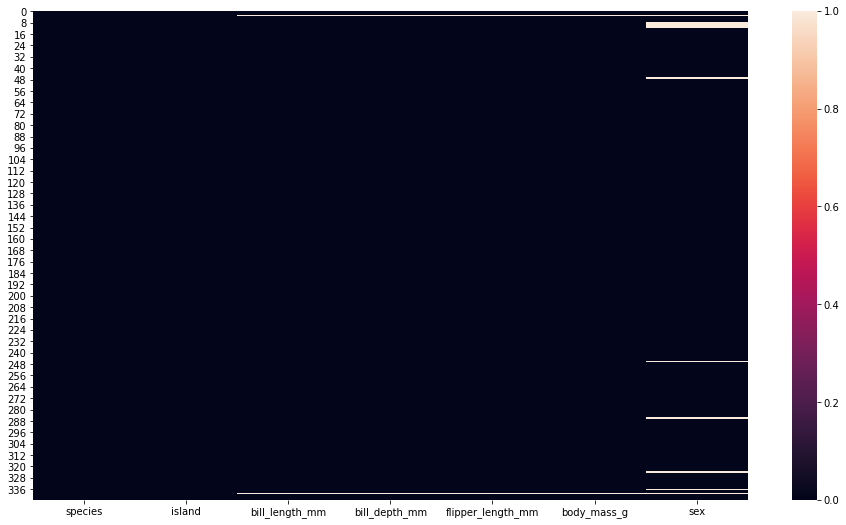

In [17]:
# figure biraz küçük geldi. boyutunu matplotlib ile büyüteyim

plt.figure(figsize=(16,9))
sns.heatmap(penguins.isnull())

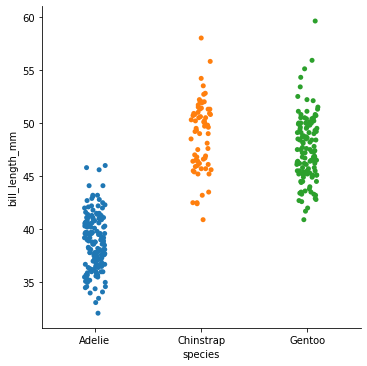

In [18]:
sns.catplot(data = penguins, x= 'species', y='bill_length_mm')

# catplot'ın kind'ının default'u stripplot'tur. stripplot scatter plot ile aynı mantıkta çalışır. 
# penguenlerin türlerini gaga uzunluklarına göre kıyaslayıp kategorik plot yaptım. 
# iki türün gaga uzunluğu açısından birbirine benzediğini ve bu yönden Adelie türünden ayrıldığını görebiliyorum. 

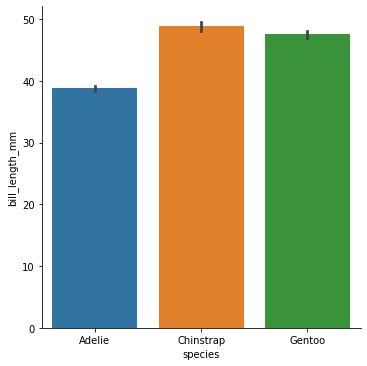

In [19]:
# kind olarak barplot yapsın

sns.catplot(data = penguins, x= 'species', y='bill_length_mm', kind='bar')

# değerlere bakarsak değerler 40 ile 50 arasında geldiğini görüyoruz. 
# burda estimator parametresi çalıştırırım orda da count_nonzero'larını çalıştırırsam türleri kendi içinde count ettim topladım.


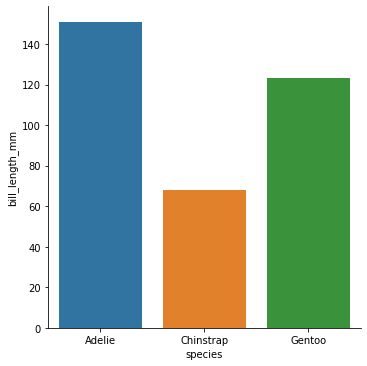

In [20]:
sns.catplot(data = penguins, x="species", y="bill_length_mm", kind="bar",
            estimator=np.count_nonzero)

# estimator : callable that maps vector -> scalar, optional
#    Statistical function to estimate within each categorical bin.
    
# estimator kullanarak bar plotta ne kullacanağımı belirliyorum.
# y eskseninde count_zero olanllarını topladım. (içindeki değer ne olursa olsun her bir değeri 1 sayacaktır.)

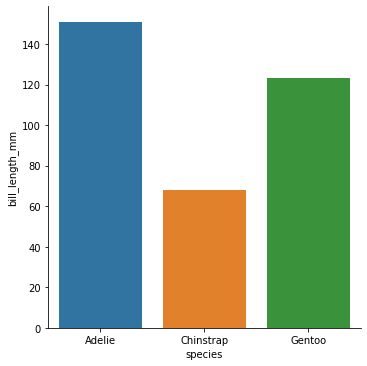

In [21]:
sns.catplot(data = penguins, x="species", y="bill_length_mm", kind="bar",
            estimator=np.count_nonzero, ci=85)

# ci = yüzde 85 gibi olursa güvenli veri gelir.
# ci = sd yaparsak ortadaki çizgiler standart sapmayı gösterir.

**Cİ (güven aralığı) ile ilgili bilgi**

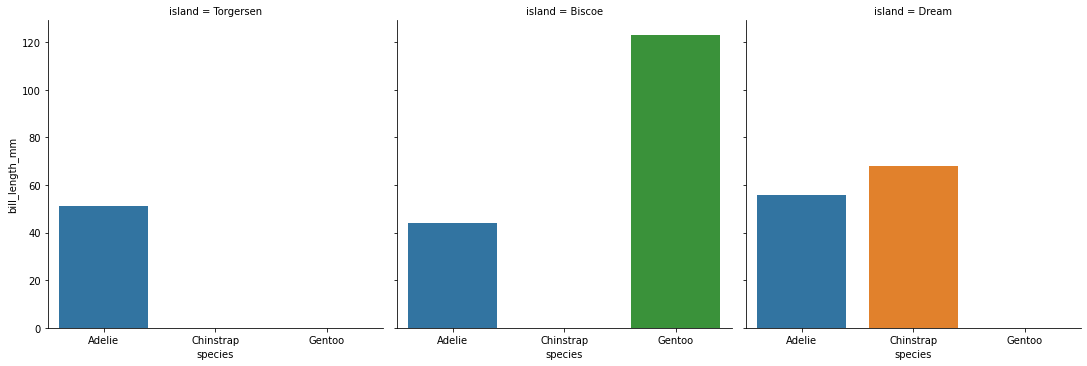

In [22]:
sns.catplot(data = penguins, x="species", y="bill_length_mm", kind="bar",
            estimator=np.count_nonzero, ci=85,
           col = 'island')

# column olarak island değerlerini aldım.

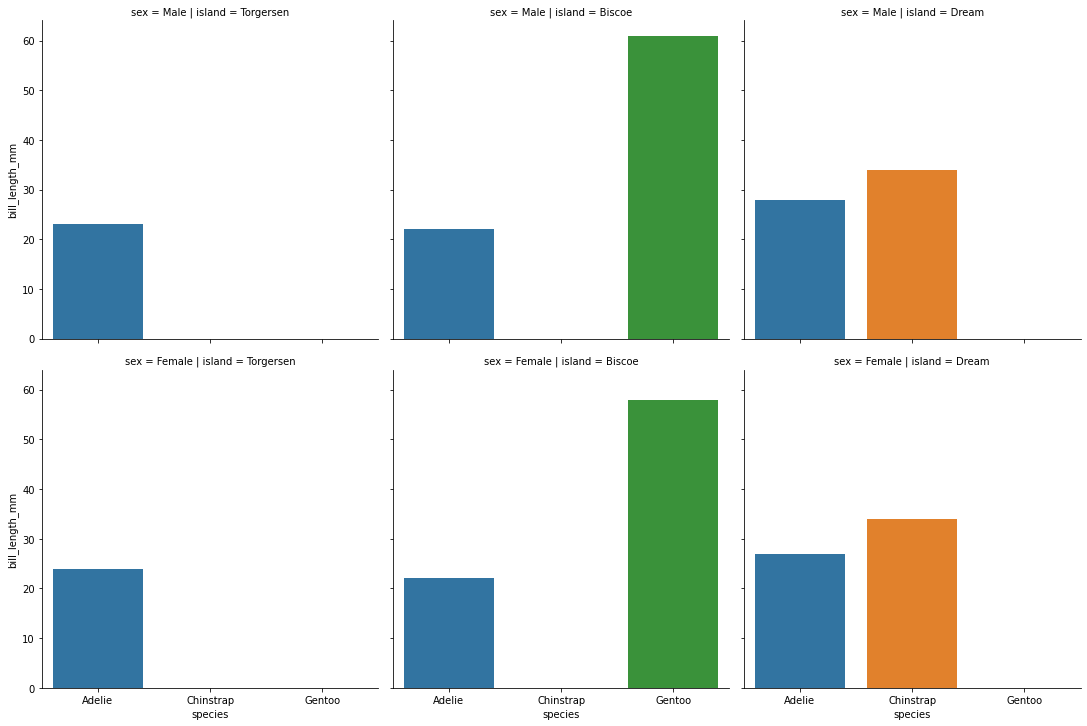

In [23]:
sns.catplot(data = penguins, x="species", y="bill_length_mm", kind="bar",
            estimator=np.count_nonzero, ci=85,
           col = 'island', row = 'sex')

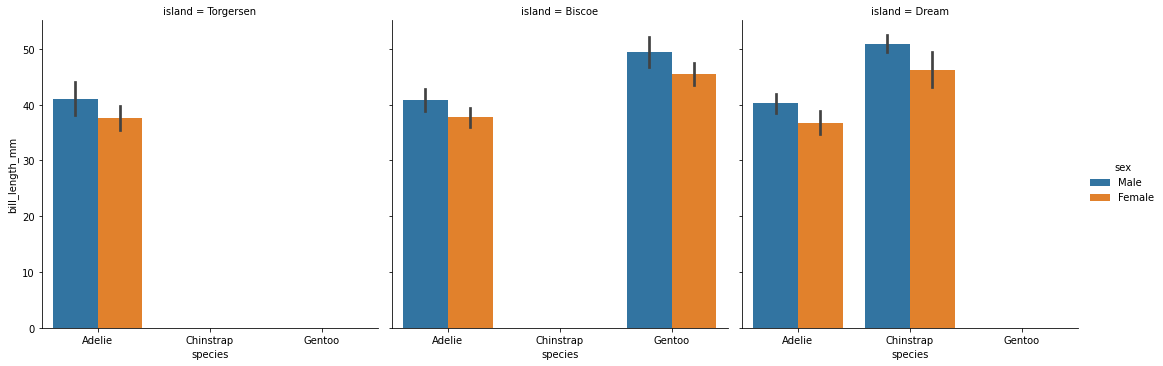

In [24]:
sns.catplot(data = penguins, x="species", y="bill_length_mm", kind="bar",estimator=np.median, ci="sd", 
            col="island",
            hue="sex")

# Estimator ile kolon daki sayılara ne işlem yapılacağını belirliyorum!!

# sex kategorisini hue ile aynı grafikte gösterdim. 

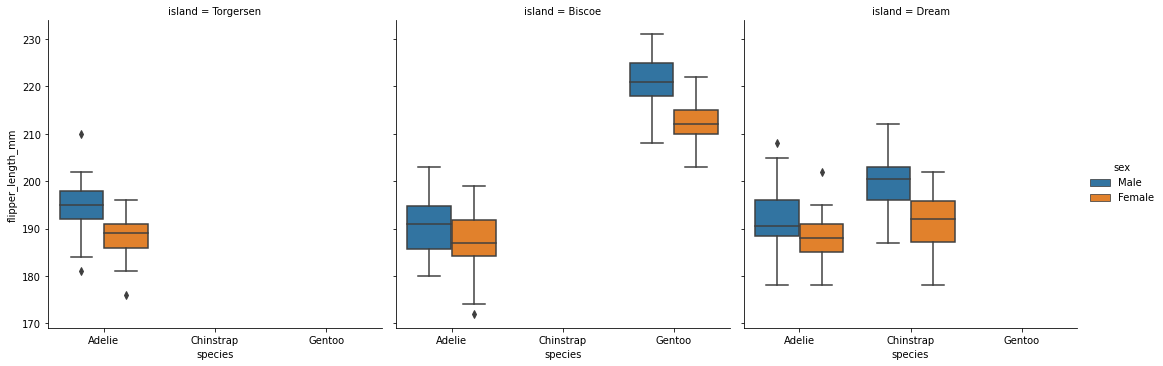

In [25]:
sns.catplot(data = penguins, x="species", y="flipper_length_mm", kind="box",
            col='island', hue="sex")

# species (türlerine göre), island (yaşadığı ada) sex olarak 3 kategorik değeri bir nümerik değere göre (flipper_lenght_mm,) kıyasladık.

# kategorik değerleri mutlaka bir nümerik değer ile kıyaslıyoruz

In [ ]:
# 4. bir kategorik veri olsaydı ve onu da katmak isteseydim onu da row=' '  ile yapacaktım

**jointplot**

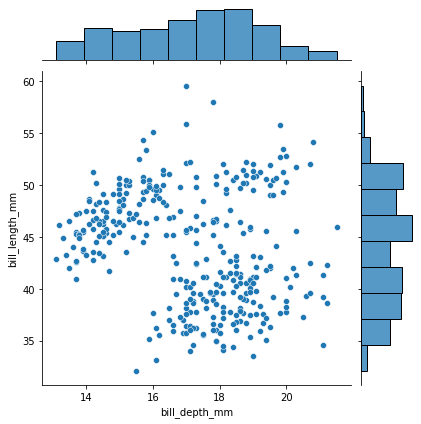

In [26]:
sns.jointplot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm')



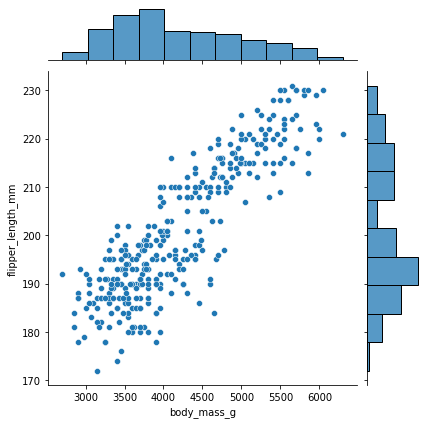

In [29]:
sns.jointplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm')

# yukardaki histogram body_mass_g'nin, sağdaki histogram flipper_length_mm'nin plotudur.



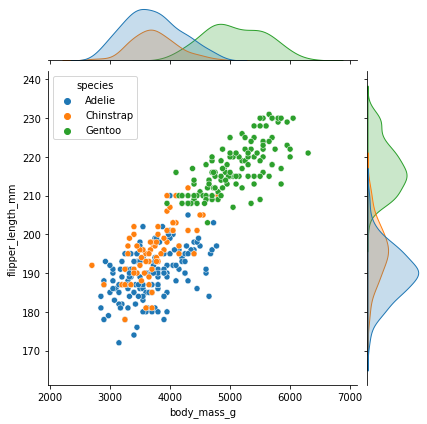

In [31]:
sns.jointplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', hue="species")

# hue ekleyince histogramların yerini kde aldı.

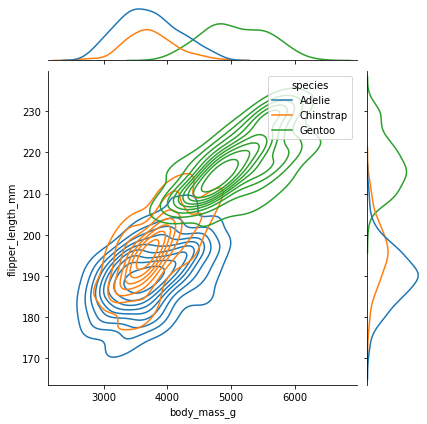

In [33]:
# kind, default olarak (yukardaki gibi) scatter plottur. kind'ı değiştirelim.

sns.jointplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', 
             kind='kde', hue = 'species')

# hue varken hex ve birkaç plot seçilmez, çünkü beraber çalışamazlar!! 
# o yüzden kind='kde' seçtim.


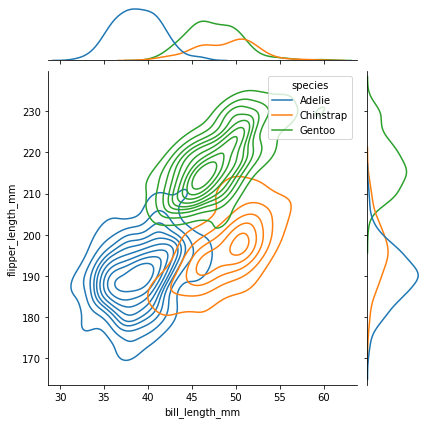

In [34]:

sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm', 
             kind='kde', hue = 'species')

# x'i bill_length_mm olarak seçince plorlar birbirinden daha belirgin ayrıldı.
# bu feature'lar ile daha iyi kategorize edebiliyorum.

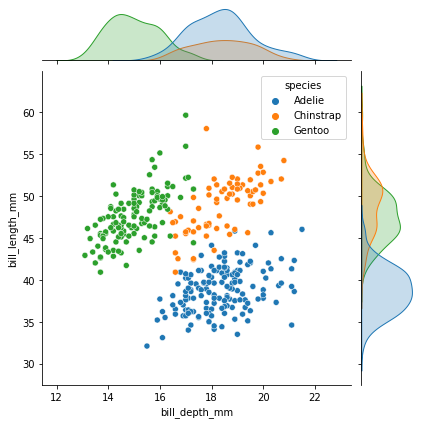

In [27]:
sns.jointplot(data = penguins, x="bill_depth_mm", y="bill_length_mm", hue="species")

# gagalarının uzunluğuna ve genişliğine göre veriler var ve bu bana anlamlı bir ilişki olduğunu söylüyor

# renler birbirine girmemiş, anlamlı bir grafik olmuş.

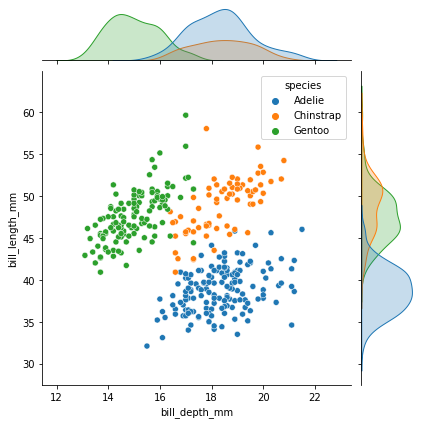

In [28]:
sns.jointplot(data = penguins, x="bill_depth_mm", y="bill_length_mm", hue="species")

# body_mass_g ile karşılaştırdığımda ise renklerin noktaların birbirine girdiğini, anlamlı bir sonuç vermediğini görüyorum
# demek ki karşılaştırdığımız her feature'dan anlamlı sonuç çıkmayabiliyor. 

**pairplot**

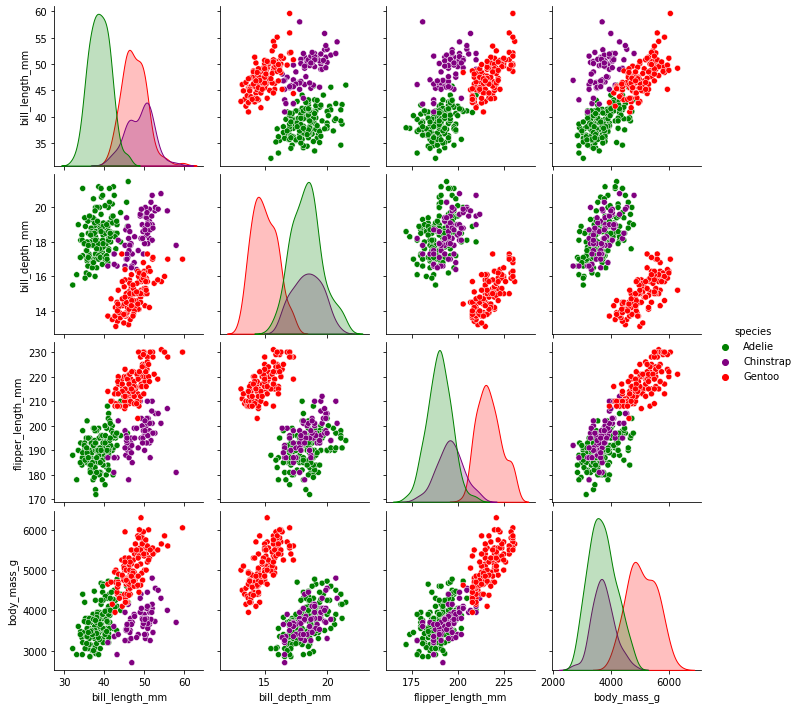

In [36]:
sns.set_palette(['green', 'purple', 'red'])

sns.pairplot(penquins, hue='species')

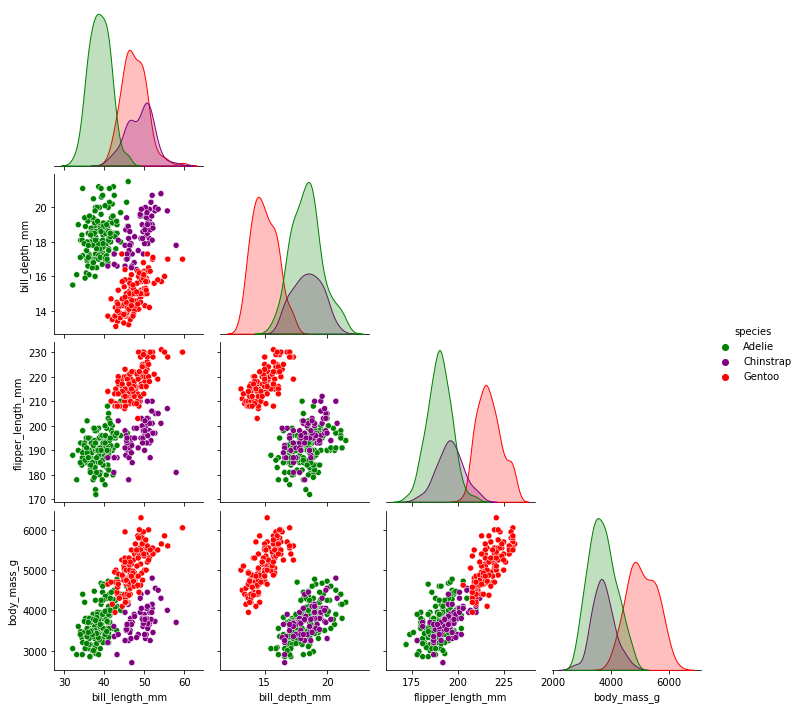

In [37]:
sns.set_palette(["green","purple","red"])
sns.pairplot(data = penguins, hue = "species", corner = True)

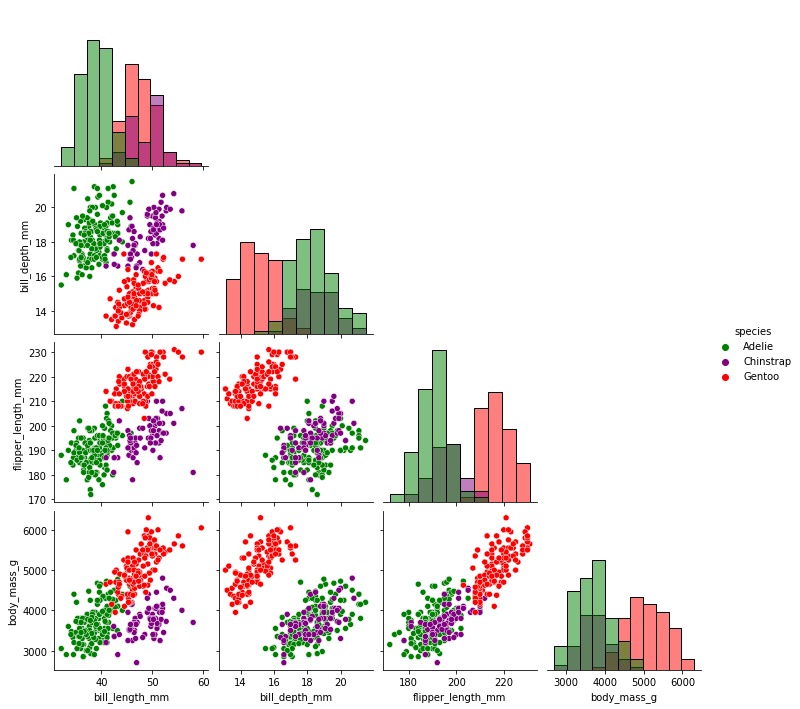

In [38]:
sns.set_palette(["green","purple","red"])
sns.pairplot(data = penguins, hue = "species", corner = True,
            diag_kind='hist')



# bu üçgen şekle alt üçgensel matris deniyor
# 1'e 1, 2'ye 2, 3'e 3 ve 4'e denk gelen yerlere diagonal denir. 
# biz burda diag_kind = 'hist' yaparak diagonalleri histogram yaptık.
# diag_kind sadece hist ve kde olabiliyor!!

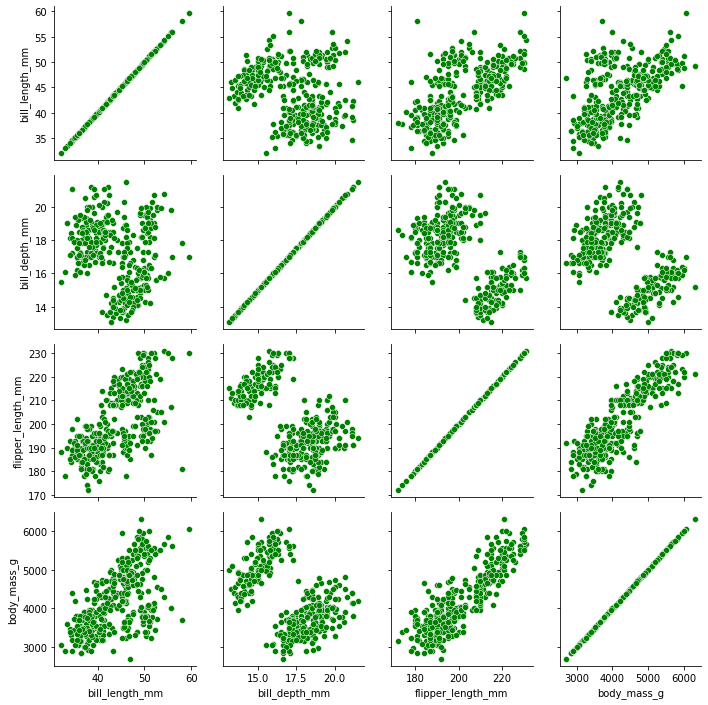

In [40]:
g = sns.PairGrid(penguins)
             
g.map(sns.scatterplot)   # sayısal değerlere sahip feature'larımı birbirleri ile scatter plot kullanarak kıyaslıyorum
             
# map'in içine hangi plotu çalıştıracağını yazıyorsun. scatter plot ile pairgrid'imizi map yaptık


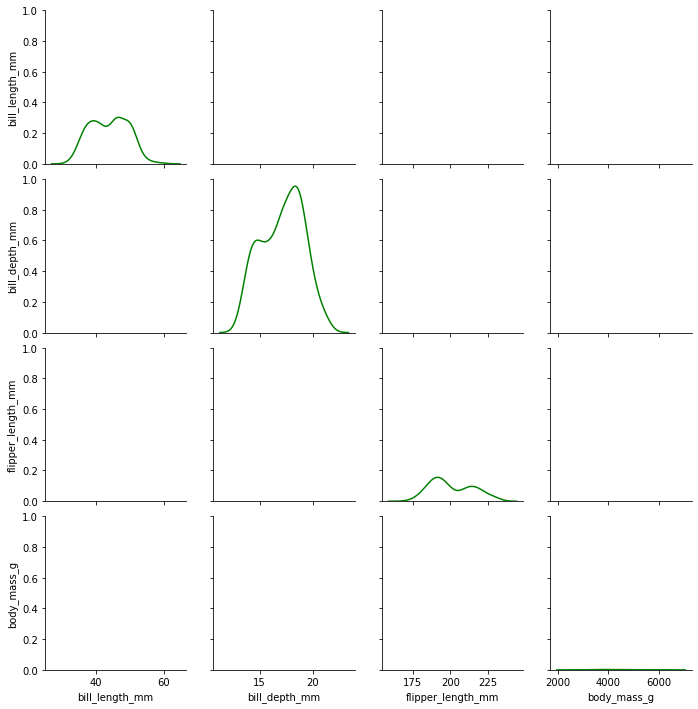

In [43]:
g = sns.PairGrid(penguins)
             
g.map_diag(sns.kdeplot)  # sayısal değerlere sahip feature'larımı birbirleri ile kde plot kullanarak kıyaslıyorum

# map_diag -->sadece köşegen (diagonal) çalıştıracak

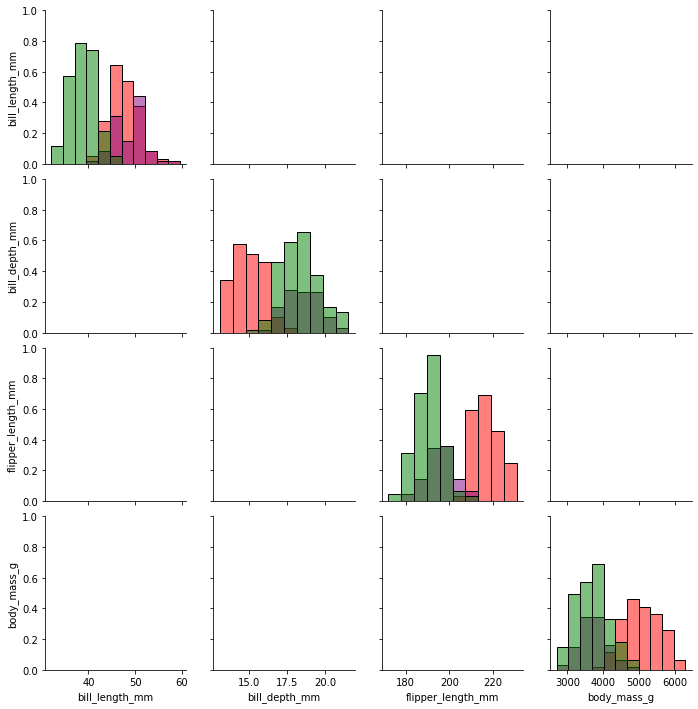

In [48]:
# histogram plotta görelim.

g = sns.PairGrid(penguins, hue='species')  
          
g.map_diag(sns.histplot)  # diagonal'de histogram plotla

# sayısal değerlere sahip feature'larımı birbirleri ile histogram plot kullanarak kıyaslıyorum
# bunu yaparken türlere göre sınıflandırma yapıyorum


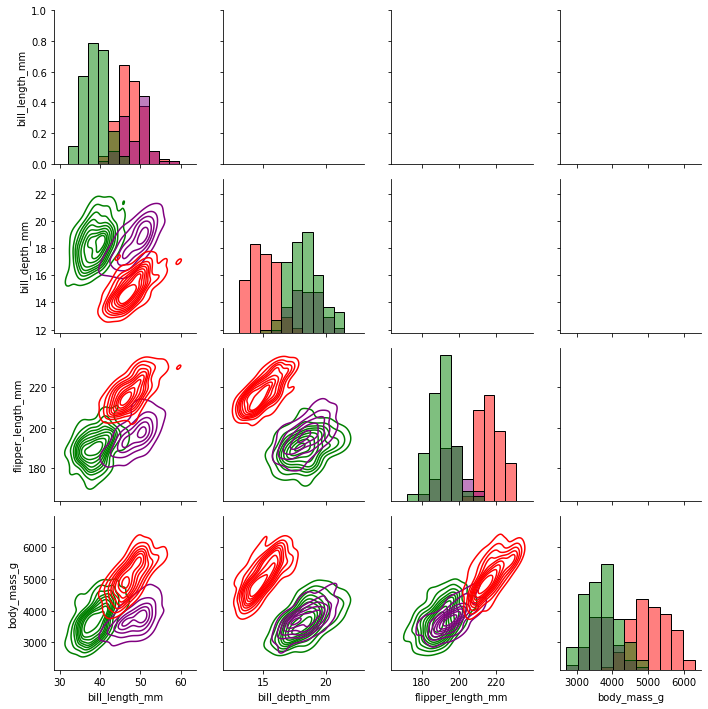

In [52]:
# kde plotu ekleyelim

g = sns.PairGrid(penguins, hue='species')
             
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)  # diagonalin altındaki üçgen alanda kde plotla

# sayısal değerlere sahip feature'larımı birbirleri ile histogram ve kdeplot kullanarak kıyaslıyorum
# bunu yaparken türlere göre sınıflandırma yapıyorum

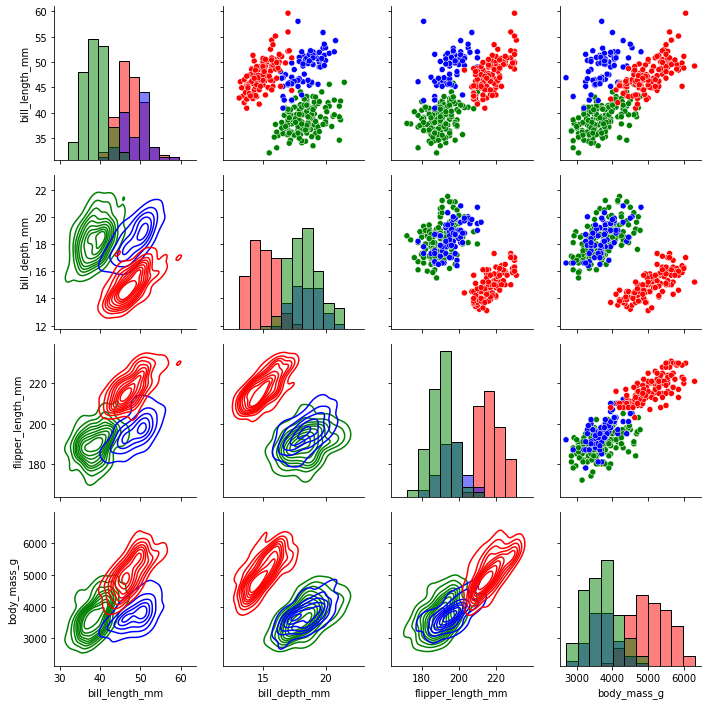

In [54]:
# scatterplotu ekleyelim
sns.set_palette(["green","blue","red"])
g = sns.PairGrid(penguins, hue='species')
             
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)  # diagonalin üstündeki üçgen alanda scatter plotla
g.map_lower(sns.kdeplot)

# sayısal değerlere sahip feature'larımı birbirleri ile histogram, kdeplot ve scatterplot kullanarak kıyaslıyorum
# bunu yaparken türlere göre sınıflandırma yapıyorum

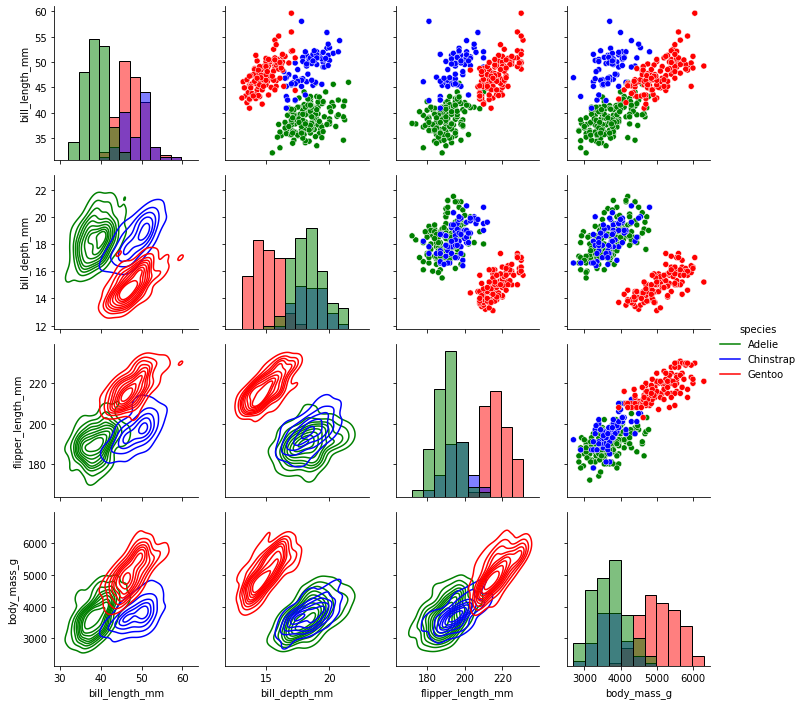

In [55]:
# legend ekledim

sns.set_palette(["green","blue","red"])
g = sns.PairGrid(penguins, hue='species')
             
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

g.add_legend();

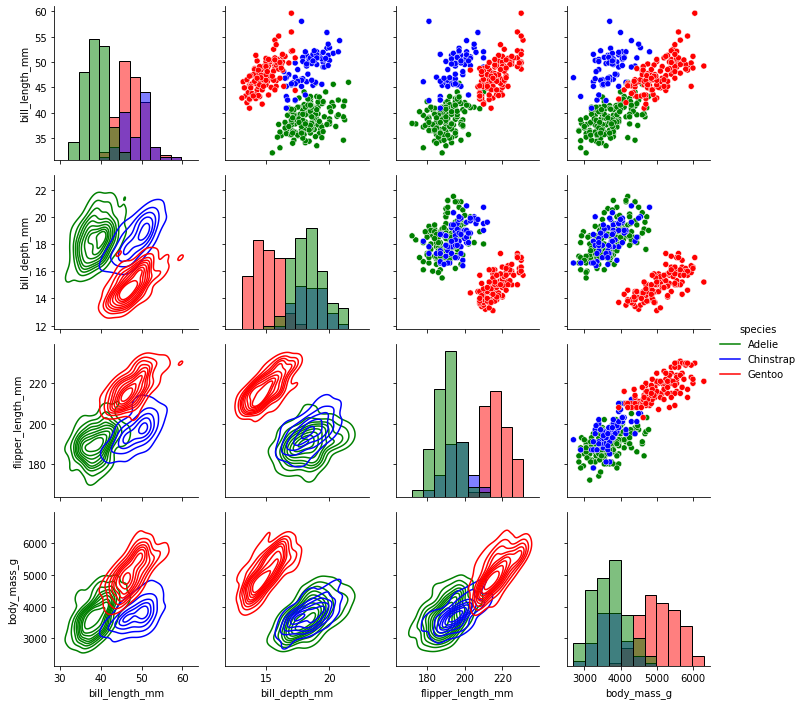

In [72]:
sns.set_palette(["green","blue","red"])
g = sns.PairGrid(penguins, hue='species', diag_sharey)
             
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

g.add_legend();

**FaceGrid**

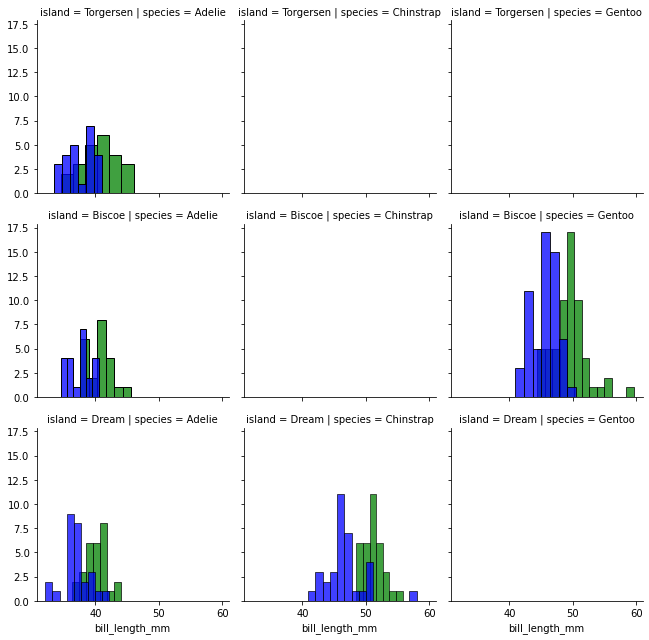

In [56]:
g = sns.FacetGrid(data = penguins, col = "species", row = "island", hue = "sex")
g.map(sns.histplot, "bill_length_mm");

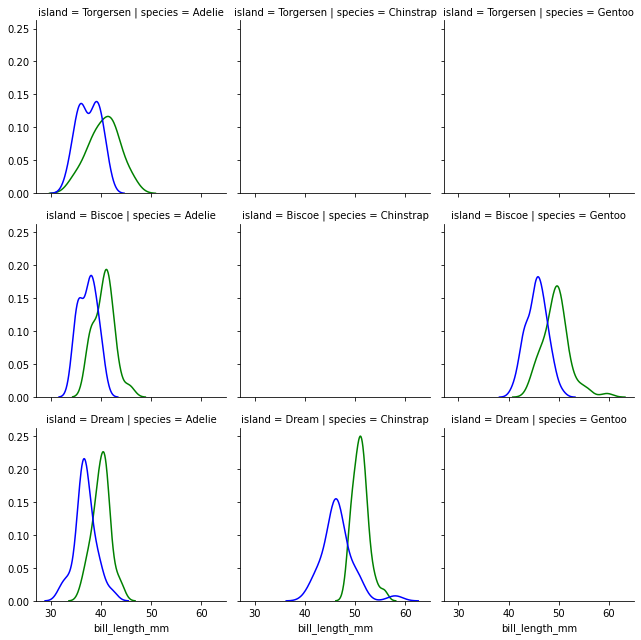

In [57]:
g = sns.FacetGrid(data = penguins, col = "species", row = "island", hue = "sex")
g.map(sns.kdeplot, "bill_length_mm");

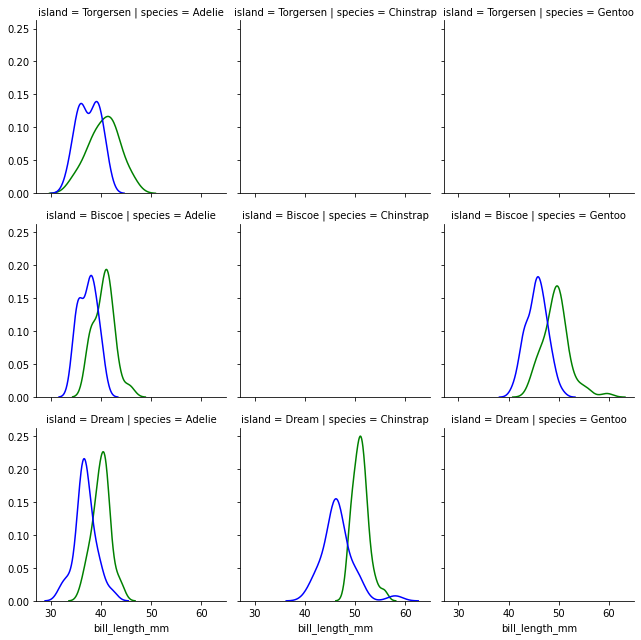

In [58]:
g = sns.FacetGrid(data = penguins, col = "species", row = "island", hue = "sex")
g.map(sns.kdeplot, "bill_length_mm");

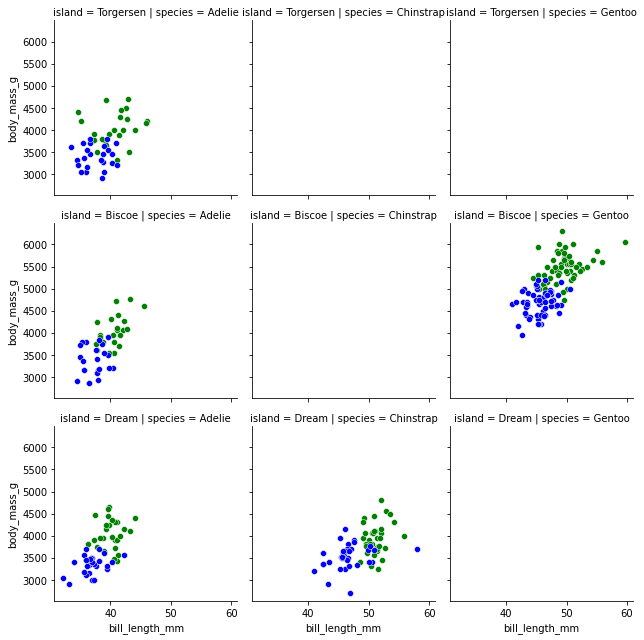

In [59]:
g = sns.FacetGrid(data = penguins, col = "species", row = "island", hue = "sex")
g.map(sns.scatterplot, "bill_length_mm", "body_mass_g");

# 3 kategoriye göre ayrıştırdım ve iki nümerik değere göre plotladım.

In [62]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [60]:
penguins.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


<AxesSubplot:>

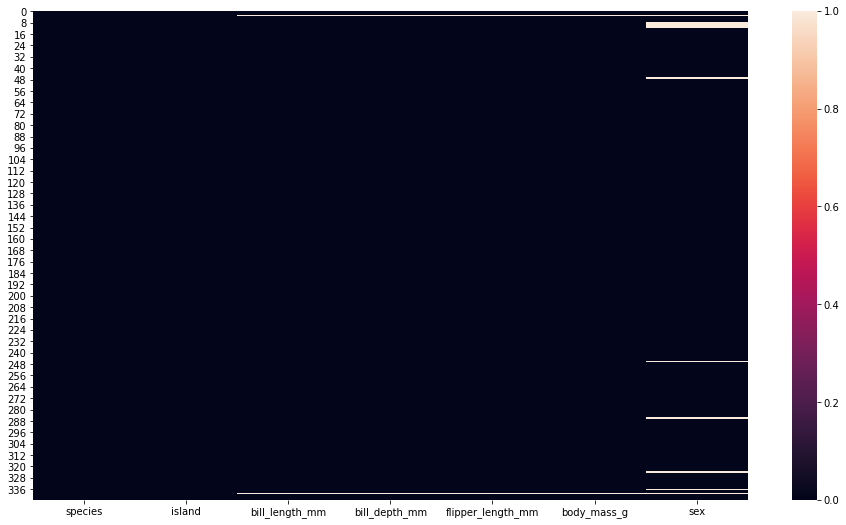

In [65]:
plt.figure(figsize=(16,9))

sns.heatmap(penguins.isnull())

# null değerleri görebiliyorum. çoğunlukla cinsiyet verisinde missing var. 
# 328'den sonra missingler üst üste binmiş 

# missing value'ları mean veya başka bir değerle doldurduktan sonra bu grafiğime tekrar bakarım. 

<AxesSubplot:>

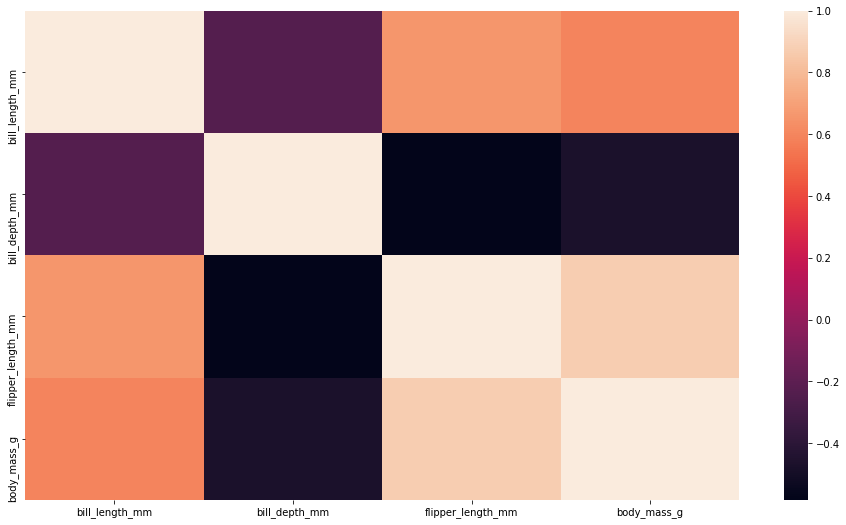

In [66]:
plt.figure(figsize=(16,9))

sns.heatmap(penguins.corr())

# köşegenlerin (diagonal) 1.0 değer aldığını renk skalasından görebiliyorum. olması gereken de bu çünkü bunlar birbirinin aynısı feature'lar

<AxesSubplot:>

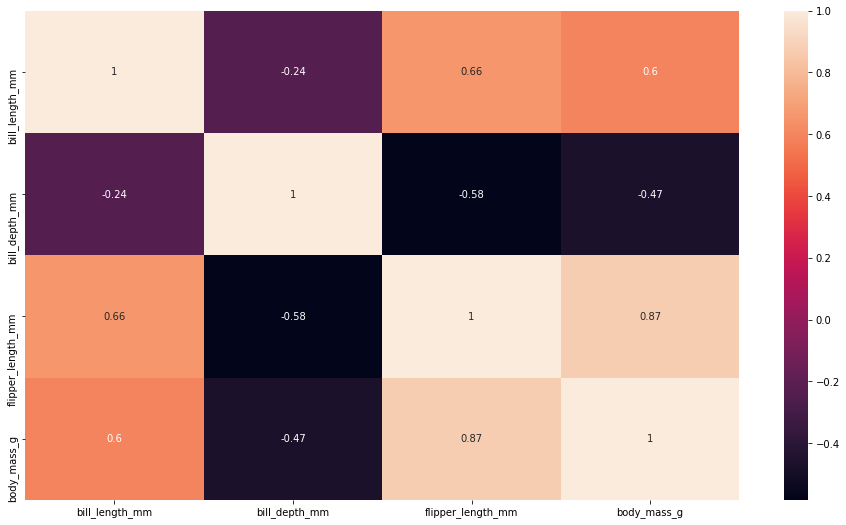

In [67]:
plt.figure(figsize=(16,9))

sns.heatmap(penguins.corr(), annot = True)

# annot = True ile corr değerlerini hücrelerin üzerinde yazdırdım.

# 1'e en yakın değerlerin korelasyonu yani birbiri ile olan ilişkisi yüksek demek.

# açık renklerde korelasyon +1'e yaklaşırken, renkler koyulaştıkça -1 değere yaklaşıyor

<AxesSubplot:>

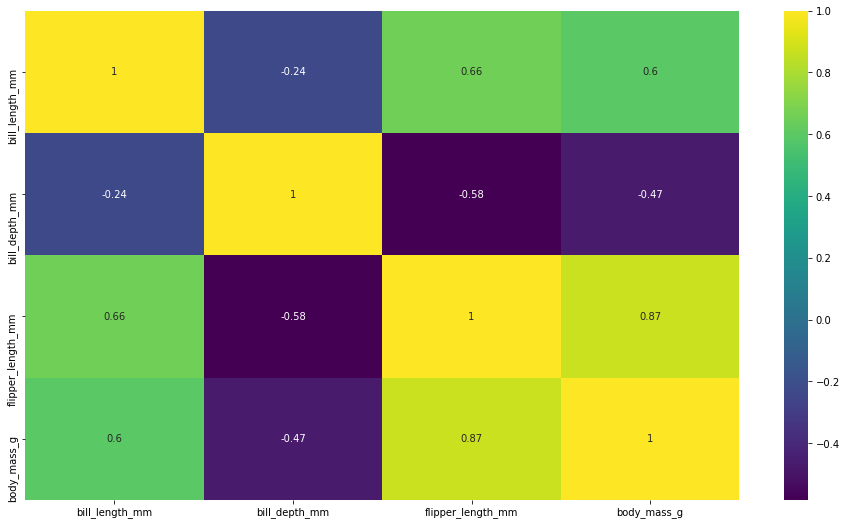

In [69]:
plt.figure(figsize=(16,9))

sns.heatmap(penguins.corr(), annot = True, cmap = 'viridis')

# renk skalasını viridis yaptım.

<AxesSubplot:>

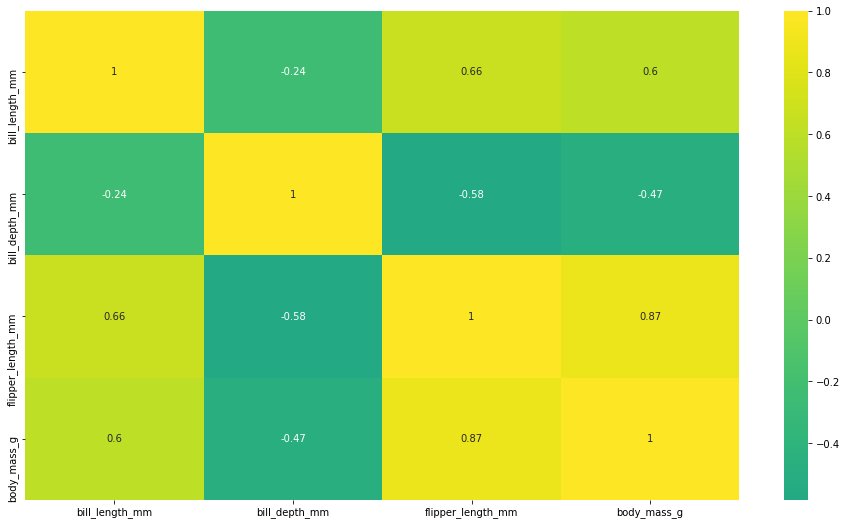

In [68]:
plt.figure(figsize=(16,9))

sns.heatmap(penguins.corr(), annot = True, cmap = 'viridis', center= -1)

# center ile merkezi belirliyorum

# The value at which to center the colormap when plotting divergant data.
# Farklı verileri çizerken renk haritasının ortalanacağı değer

**Clustermap**

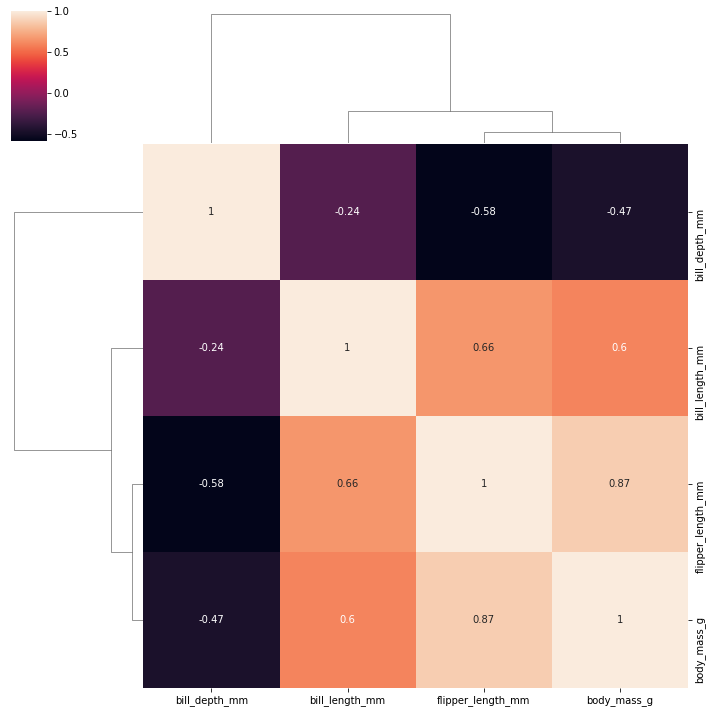

In [70]:
sns.clustermap(penguins.corr(), annot = True)